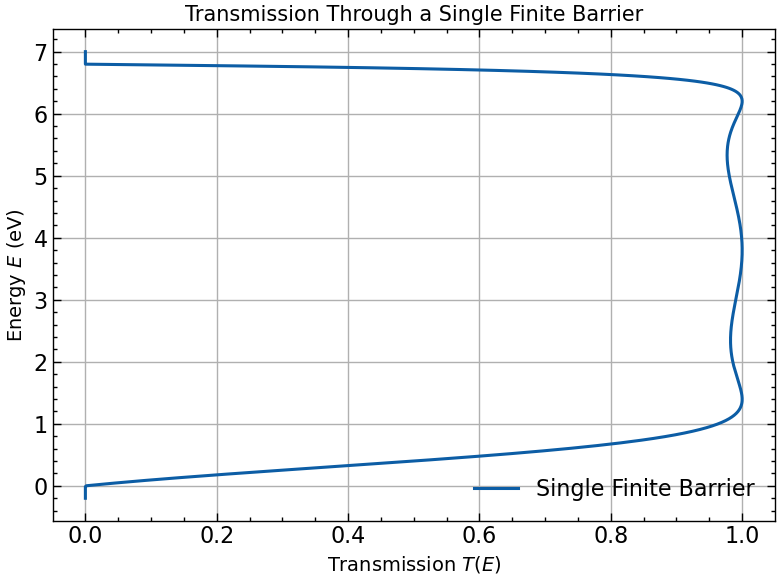

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Physical constants (in eV units) ===
hbar = 1.055e-34      # J.s
q = 1.6e-19           # C
m_eff = 0.25 * 9.1e-31  # Effective mass
a = 3e-10             # Lattice spacing (m)
t0 = (hbar**2) / (2 * m_eff * a**2 * q)  # in eV

# === Device setup ===
NS = 23
NC = 4
ND = 23
Np = NS + NC + ND

UB = np.zeros(Np)
UB[NS:NS+NC] = 0.4  # Barrier in the middle

# === Hamiltonian ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
H = H0 + np.diag(UB)

# === Energy grid ===
E_list = np.linspace(-0.2,7, 501)  # Energy range (eV)
zplus = 1j * 1e-12
T_E = []

for EE in E_list:
    # === Self-energies ===
    ck1 = 1 - (EE + zplus - UB[0]) / (2 * t0)
    ka1 = np.arccos(ck1) if np.abs(ck1) <= 1 else 1j * np.arccosh(np.abs(ck1))
    s1 = -t0 * np.exp(1j * ka1)

    ck2 = 1 - (EE + zplus - UB[-1]) / (2 * t0)
    ka2 = np.arccos(ck2) if np.abs(ck2) <= 1 else 1j * np.arccosh(np.abs(ck2))
    s2 = -t0 * np.exp(1j * ka2)

    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1
    Sigma2[-1, -1] = s2

    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # === Green's function ===
    G = np.linalg.inv((EE + zplus) * np.eye(Np) - H - Sigma1 - Sigma2)

    # === Transmission ===
    T = np.real(np.trace(Gamma1 @ G @ Gamma2 @ G.conj().T))
    T_E.append(T)

# === Plot Transmission vs Energy ===
plt.figure(figsize=(8, 6))
plt.plot(T_E , E_list, linewidth=2.2, label="Single Finite Barrier")
plt.ylabel(r"Energy $E$ (eV)", fontsize=14)
plt.xlabel(r"Transmission $T(E)$", fontsize=14)
plt.title("Transmission Through a Single Finite Barrier", fontsize=15)
plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


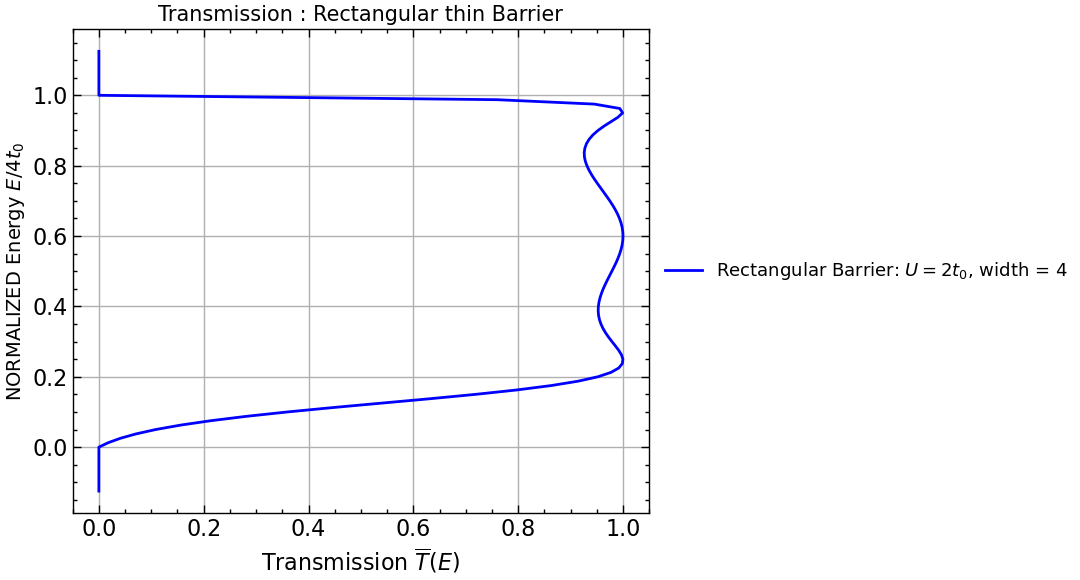

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0               # Hopping energy
Np = 10               # Number of sites in the wire
VV = 0.0               # No bias
UB1 = 0.4* t0           # Barrier height
N1 = 5                # Scatterer position
zplus = 1j * 1e-12     # Small imaginary part
dE = 0.05
E_list = np.arange(-0.5, 4.5 + dE, dE) * t0

def compute_transmission(H0, UV, E_list):
    U = np.diag(UV)
    Tcoh = []
    for EE in E_list:
        ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
        ka1 = np.arccos(ck1)
        s1 = -t0 * np.exp(1j * ka1)
        Sigma1 = np.zeros((Np, Np), dtype=complex)
        Sigma1[0, 0] = s1

        ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
        ka2 = np.arccos(ck2)
        s2 = -t0 * np.exp(1j * ka2)
        Sigma2 = np.zeros((Np, Np), dtype=complex)
        Sigma2[-1, -1] = s2

        Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
        Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

        G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)
        T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
        Tcoh.append(T)
    return Tcoh

# === Common potential profile ===
UV = np.linspace(0, -VV, Np)

#  Rectangular Barrier 
H_rect = np.diag(2 * t0 * np.ones(Np)) + np.diag(-t0 * np.ones(Np - 1), 1) + np.diag(-t0 * np.ones(Np - 1), -1)
width = 4
for i in range(N1, N1 + width):
    H_rect[i, i] += UB1
T_rect = compute_transmission(H_rect, UV, E_list)


# === Plotting ===
plt.figure(figsize=(11, 6))
plt.plot(T_rect, E_list / 4*t0, 'b', linewidth=2, label=r"Rectangular Barrier: $U = 2t_0$, width = 4")
plt.xlabel(r"Transmission $\overline{T}(E)$", fontsize=16)
plt.ylabel(r"NORMALIZED Energy $E / 4t_0$", fontsize=14)
plt.title("Transmission : Rectangular thin Barrier", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


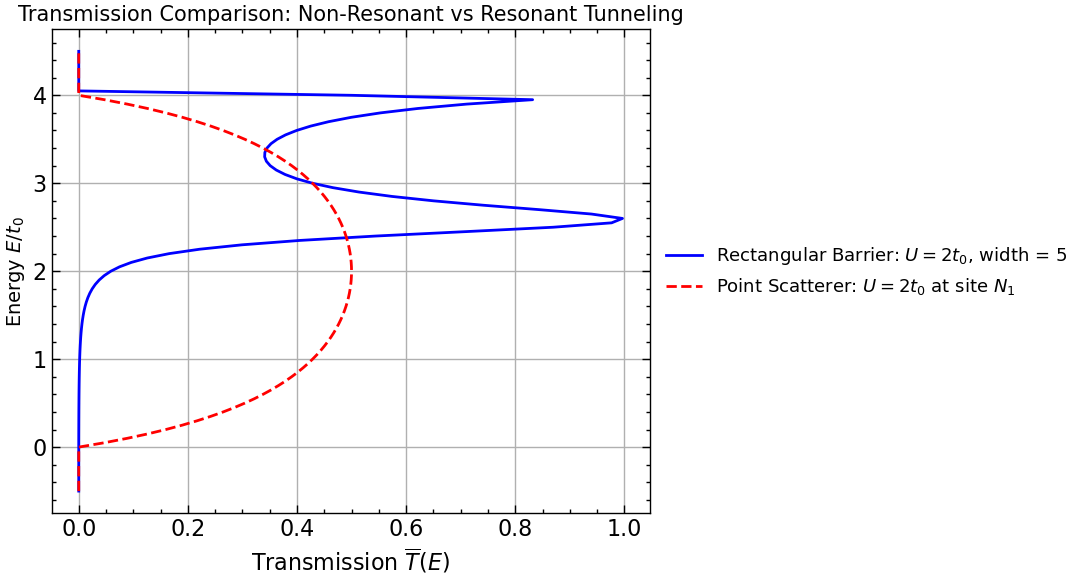

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0               # Hopping energy
Np = 100               # Number of sites in the wire
VV = 0.0               # No bias
UB1 = 2 * t0           # Barrier height
N1 = 50                # Scatterer position
zplus = 1j * 1e-12     # Small imaginary part
dE = 0.05
E_list = np.arange(-0.5, 4.5 + dE, dE) * t0

def compute_transmission(H0, UV, E_list):
    U = np.diag(UV)
    Tcoh = []
    for EE in E_list:
        ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
        ka1 = np.arccos(ck1)
        s1 = -t0 * np.exp(1j * ka1)
        Sigma1 = np.zeros((Np, Np), dtype=complex)
        Sigma1[0, 0] = s1

        ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
        ka2 = np.arccos(ck2)
        s2 = -t0 * np.exp(1j * ka2)
        Sigma2 = np.zeros((Np, Np), dtype=complex)
        Sigma2[-1, -1] = s2

        Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
        Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

        G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)
        T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
        Tcoh.append(T)
    return Tcoh

# === Common potential profile ===
UV = np.linspace(0, -VV, Np)

# === Case 1: Rectangular Barrier ===
H_rect = np.diag(2 * t0 * np.ones(Np)) + np.diag(-t0 * np.ones(Np - 1), 1) + np.diag(-t0 * np.ones(Np - 1), -1)
width = 4
for i in range(N1, N1 + width):
    H_rect[i, i] += UB1
T_rect = compute_transmission(H_rect, UV, E_list)

# === Case 2: Point Scatterer ===
H_point = np.diag(2 * t0 * np.ones(Np)) + np.diag(-t0 * np.ones(Np - 1), 1) + np.diag(-t0 * np.ones(Np - 1), -1)
H_point[N1, N1] += UB1
T_point = compute_transmission(H_point, UV, E_list)

# === Plotting ===
plt.figure(figsize=(11, 6))
plt.plot(T_rect, E_list / t0, 'b', linewidth=2, label=r"Rectangular Barrier: $U = 2t_0$, width = 5")
plt.plot(T_point, E_list / t0, 'r--', linewidth=2, label=r"Point Scatterer: $U = 2t_0$ at site $N_1$")
plt.xlabel(r"Transmission $\overline{T}(E)$", fontsize=16)
plt.ylabel(r"Energy $E / t_0$", fontsize=14)
plt.title("Transmission Comparison: Non-Resonant vs Resonant Tunneling", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


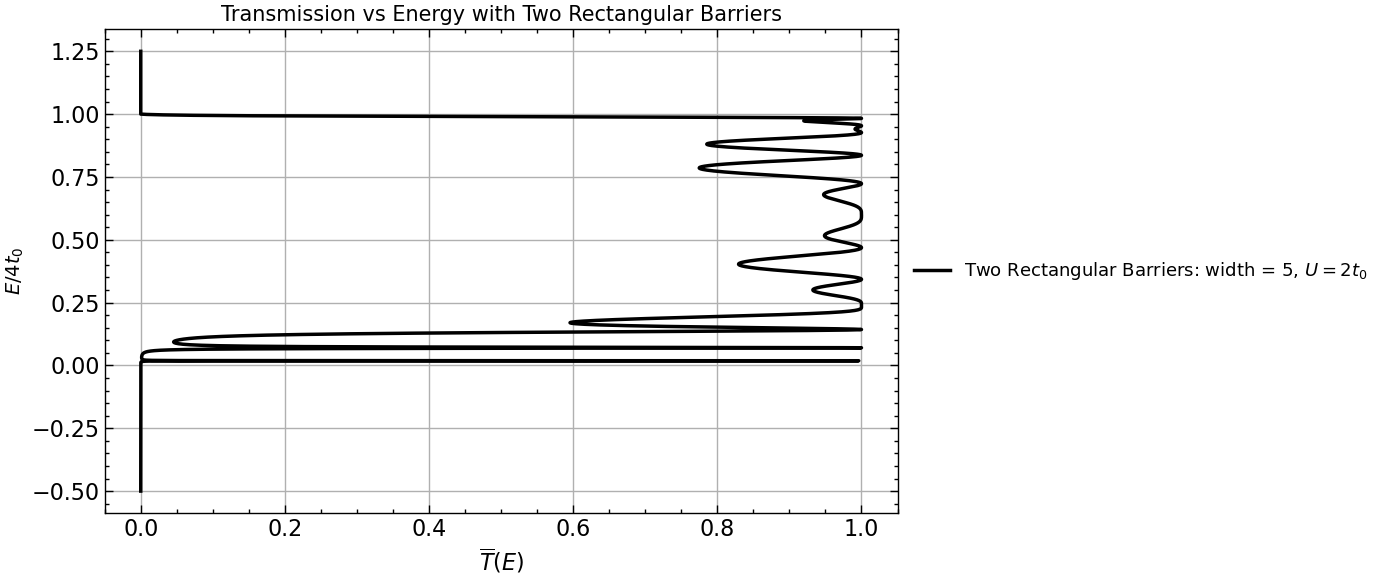

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1  # in eV
Np = 100                # Number of sites in the wire
N1, N2 = 3, 15           # Scatterer positions
VV = 0                  # No bias
zplus = 1j * 1e-12      # Small imaginary part for convergence
dE = 5e-4               # Fine energy resolution
E_list = np.arange(-2, 5 + dE, dE) * t0

# === Common Diagonals ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)

# === Store results ===
Tcoh_2s = []
theta_2s = []

# === Common Linear Potential ===
UV = np.linspace(0, -VV, Np)
U = np.diag(UV)

UB1 = 0.4 * t0
UB2 = 0.4 * t0

# Hamiltonian with one scatterer
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

#TWO_RECTANGULAR_BARRIERS
width = 4
for i in range(N1, N1 + width):
    H0[i, i] += UB1
for i in range(N2, N2 + width):
    H0[i, i] += UB2

for EE in E_list:
    # Self-energies
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # Broadening matrices
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # Green's function
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # Transmission
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh_2s.append(T)

    # Theta (same formula)
    theta = np.real(ka1) * (N2 - N1 + 1) / np.pi
    theta_2s.append(theta)

# === Plotting ===
plt.figure(figsize=(14, 6))  # Wider aspect ratio


plt.plot(Tcoh_2s, E_list / (4 * t0), 'k-', linewidth=2.5,label=r"Two Rectangular Barriers: width = 5, $U = 2t_0$")
plt.xlabel(r"$\overline{T}(E)$", fontsize=16)
plt.ylabel(r"$E / 4t_0$", fontsize=14)
plt.title("Transmission vs Energy with Two Rectangular Barriers", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


Computing I–V: 100%|██████████| 61/61 [08:00<00:00,  7.88s/it]


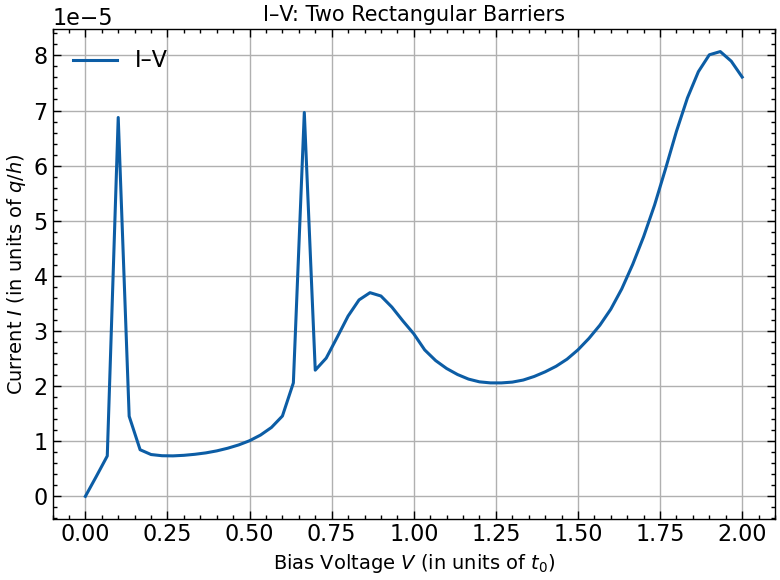

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # progress bar
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0
Np = 100
N1, N2 = 3, 15
UB1 = 1 * t0
UB2 = 1 * t0
width = 5
zplus = 1j * 1e-12
dE = 1e-3  # use slightly coarser step to reduce cost
E_list = np.arange(-2, 5 + dE, dE) * t0
kT = 0.1 * t0
q = 1.0
h = 1.0

# === Voltage range ===
V_list = np.linspace(0, 2.0, 61)  # reduce number of steps slightly
I_list = []

# === Common diagonals ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)

# === Progress bar loop ===
for VV in tqdm(V_list, desc="Computing I–V"):

    # Linear drop
    UV = np.linspace(VV / 2, -VV / 2, Np)
    U = np.diag(UV)

    # Hamiltonian + barriers
    H0 = np.diag(main_diag.copy()) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    H0[N1:N1 + width, N1:N1 + width] += np.diag(UB1 * np.ones(width))
    H0[N2:N2 + width, N2:N2 + width] += np.diag(UB2 * np.ones(width))

    T_E = np.zeros_like(E_list)

    # Pre-compute lead potentials
    uL, uR = UV[0], UV[-1]

    for idx, EE in enumerate(E_list):
        # Left lead self-energy
        ck1 = 1 - (EE - uL + zplus) / (2 * t0)
        ka1 = np.arccos(ck1) if np.abs(ck1) <= 1 else 1j * np.arccosh(np.abs(ck1))
        s1 = -t0 * np.exp(1j * ka1)

        # Right lead self-energy
        ck2 = 1 - (EE - uR + zplus) / (2 * t0)
        ka2 = np.arccos(ck2) if np.abs(ck2) <= 1 else 1j * np.arccosh(np.abs(ck2))
        s2 = -t0 * np.exp(1j * ka2)

        # Self-energy matrices
        Sigma1 = np.zeros((Np, Np), dtype=complex)
        Sigma2 = np.zeros((Np, Np), dtype=complex)
        Sigma1[0, 0] = s1
        Sigma2[-1, -1] = s2

        # Broadening
        Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
        Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

        # Green's function
        G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

        # Transmission
        T_E[idx] = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))

    # Fermi distributions
    mu1 = +VV / 2
    mu2 = -VV / 2
    f1 = 1 / (1 + np.exp((E_list - mu1) / kT))
    f2 = 1 / (1 + np.exp((E_list - mu2) / kT))

    # Landauer current
    integrand = T_E * (f1 - f2)
    I = (q / h) * np.sum(integrand) * dE
    I_list.append(I)

# === Plotting I–V ===
plt.figure(figsize=(8, 6))
plt.plot(V_list, I_list, linewidth=2.2, label="I–V")
plt.xlabel(r"Bias Voltage $V$ (in units of $t_0$)", fontsize=14)
plt.ylabel(r"Current $I$ (in units of $q/h$)", fontsize=14)
plt.title("I–V: Two Rectangular Barriers", fontsize=15)
plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


Computing I–V: 100%|██████████| 61/61 [07:25<00:00,  7.31s/it]


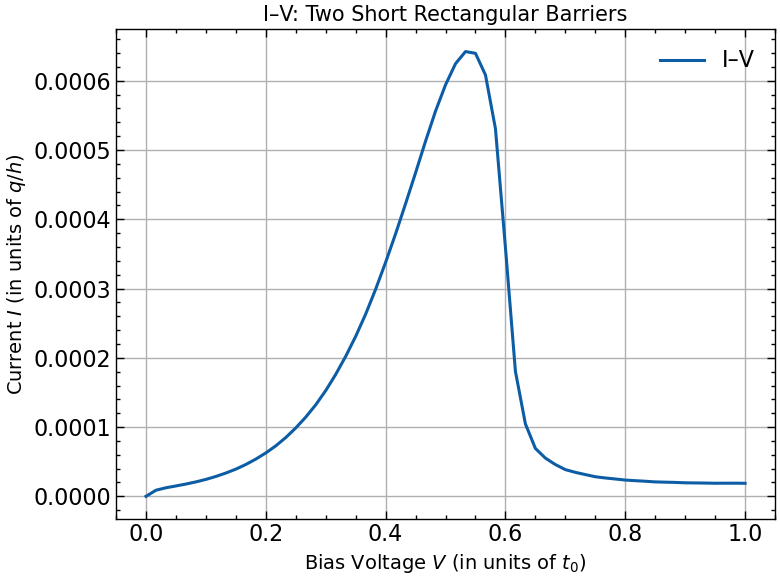

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # progress bar
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0
Np = 100
N1, N2 = 3, 15
UB1 = 0.4 * t0
UB2 = 0.4 * t0
width = 3
zplus = 1j * 1e-12
dE = 1e-3  # use slightly coarser step to reduce cost
E_list = np.arange(-2, 5 + dE, dE) * t0
kT = 0.01 * t0
q = 1.0
h = 1.0

# === Voltage range ===
V_list = np.linspace(0, 1.0, 61)  # reduce number of steps slightly
I_list = []

# === Common diagonals ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)

# === Progress bar loop ===
for VV in tqdm(V_list, desc="Computing I–V"):

    # Linear drop
    UV = np.linspace(VV / 2, -VV / 2, Np)
    U = np.diag(UV)

    # Hamiltonian + barriers
    H0 = np.diag(main_diag.copy()) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    H0[N1:N1 + width, N1:N1 + width] += np.diag(UB1 * np.ones(width))
    H0[N2:N2 + width, N2:N2 + width] += np.diag(UB2 * np.ones(width))

    T_E = np.zeros_like(E_list)

    # Pre-compute lead potentials
    uL, uR = UV[0], UV[-1]

    for idx, EE in enumerate(E_list):
        # Left lead self-energy
        ck1 = 1 - (EE - uL + zplus) / (2 * t0)
        ka1 = np.arccos(ck1) if np.abs(ck1) <= 1 else 1j * np.arccosh(np.abs(ck1))
        s1 = -t0 * np.exp(1j * ka1)

        # Right lead self-energy
        ck2 = 1 - (EE - uR + zplus) / (2 * t0)
        ka2 = np.arccos(ck2) if np.abs(ck2) <= 1 else 1j * np.arccosh(np.abs(ck2))
        s2 = -t0 * np.exp(1j * ka2)

        # Self-energy matrices
        Sigma1 = np.zeros((Np, Np), dtype=complex)
        Sigma2 = np.zeros((Np, Np), dtype=complex)
        Sigma1[0, 0] = s1
        Sigma2[-1, -1] = s2

        # Broadening
        Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
        Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

        # Green's function
        G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

        # Transmission
        T_E[idx] = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))

    # Fermi distributions
    mu1 = +VV / 2
    mu2 = -VV / 2
    f1 = 1 / (1 + np.exp((E_list - mu1) / kT))
    f2 = 1 / (1 + np.exp((E_list - mu2) / kT))

    # Landauer current
    integrand = T_E * (f1 - f2)
    I = (q / h) * np.sum(integrand) * dE
    I_list.append(I)

# === Plotting I–V ===
plt.figure(figsize=(8, 6))
plt.plot(V_list, I_list, linewidth=2.2, label="I–V")
plt.xlabel(r"Bias Voltage $V$ (in units of $t_0$)", fontsize=14)
plt.ylabel(r"Current $I$ (in units of $q/h$)", fontsize=14)
plt.title("I–V: Two Short Rectangular Barriers", fontsize=15)
plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

The following device is like:

Lead — Barrier₁ (low) — Well — Barrier₂ (tall) — Lead


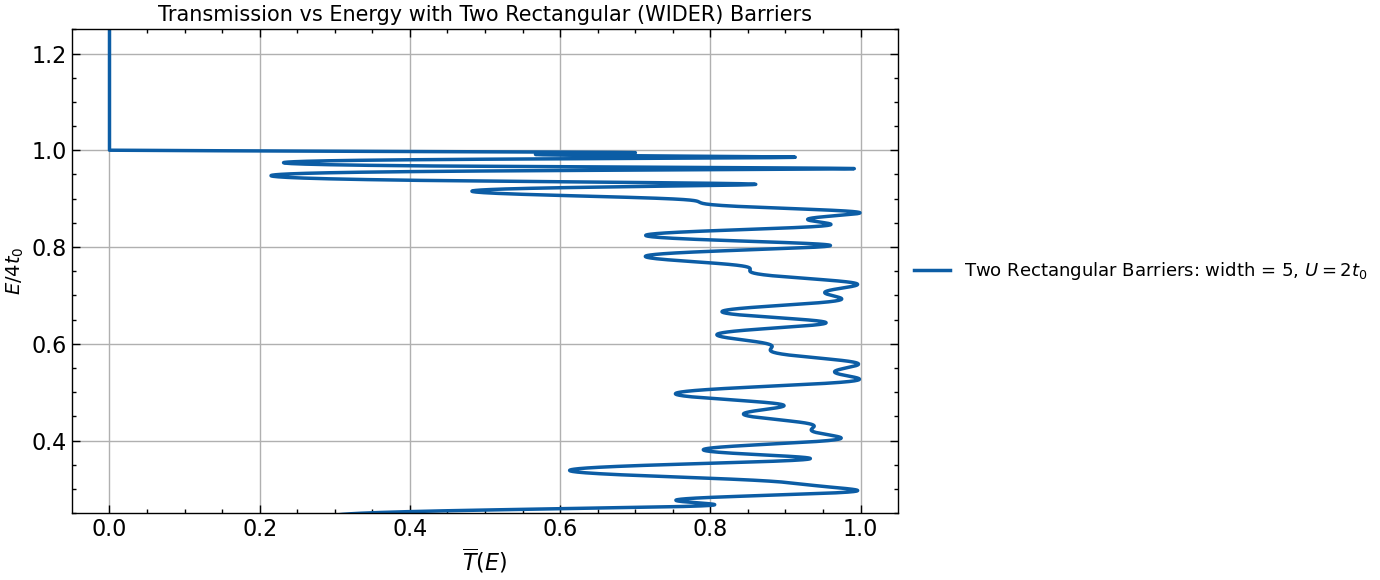

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0                # Hopping energy
Np = 100                # Number of sites in the wire
N1, N2 = 3, 30           # Scatterer positions
VV = 0                  # No bias
zplus = 1j * 1e-12      # Small imaginary part for convergence
dE = 5e-4               # Fine energy resolution
E_list = np.arange(-2, 5 + dE, dE) * t0

# === Common Diagonals ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)

# === Store results ===
Tcoh_2s = []
theta_2s = []

# === Common Linear Potential ===
UV = np.linspace(0, -VV, Np)
U = np.diag(UV)

UB1 = 0.4 * t0
UB2 = 0.8 * t0

H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
#TWO_RECTANGULAR_BARRIERS
width = 10
for i in range(N1, N1 + width):
    H0[i, i] += UB1
for i in range(N2, N2 + width):
    H0[i, i] += UB2


for EE in E_list:
    # Self-energies
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # Broadening matrices
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # Green's function
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # Transmission
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh_2s.append(T)

    # Theta (same formula)
    theta = np.real(ka1) * (N2 - N1 + 1) / np.pi
    theta_2s.append(theta)

# === Plotting ===

plt.figure(figsize=(14, 6))  # Wider aspect ratio

plt.plot(Tcoh_2s, E_list / (4 * t0),  linewidth=2.5,label=r"Two Rectangular Barriers: width = 5, $U = 2t_0$")
plt.xlabel(r"$\overline{T}(E)$", fontsize=16)
plt.ylabel(r"$E / 4t_0$", fontsize=14)
plt.title("Transmission vs Energy with Two Rectangular (WIDER) Barriers", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
plt.ylim(0.25 , 1.25 )
plt.grid(True)
plt.tight_layout()
plt.show()